# **Preprocesing**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from langid.langid import LanguageIdentifier, model
import re
import emoji
from pyvi import ViTokenizer

## **Convert raw data to dataframe**

In [2]:
def load_data_from_path(folder_path):
    examples = []
    for label in os.listdir(folder_path):
        full_path = os.path.join(folder_path, label)
        for file_name in os.listdir(full_path):
            file_path = os.path.join(full_path, file_name)
            with open(file_path, "r", encoding="utf-8") as f:
                lines = f.readlines()
            sentence = " ".join(lines)
            if label == "neg":
                label = 0
            if label == "pos":
                label = 1
            data = {
                'sentence': sentence,
                'label': label
            }
            examples.append(data)
    return pd.DataFrame(examples)   

In [20]:
folder_paths = {
    'train': r'./data/train',
    'valid': r'./data/val',
    'test': r'./data/test'
}

train_df = load_data_from_path(folder_paths['train'])
valid_df = load_data_from_path(folder_paths['valid'])
test_df = load_data_from_path(folder_paths['test'])

In [26]:
train_df.info()

30001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  30001 non-null  object
 1   label     30001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


In [27]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  10000 non-null  object
 1   label     10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  10000 non-null  object
 1   label     10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [30]:
train_df.head()

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0


# **EDA with full dataset**

In [31]:
full_df = pd.concat([train_df, valid_df, test_df], ignore_index=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  50001 non-null  object
 1   label     50001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [32]:
full_df.head()

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0


In [34]:
full_df.isnull().sum()

sentence    0
label       0
dtype: int64

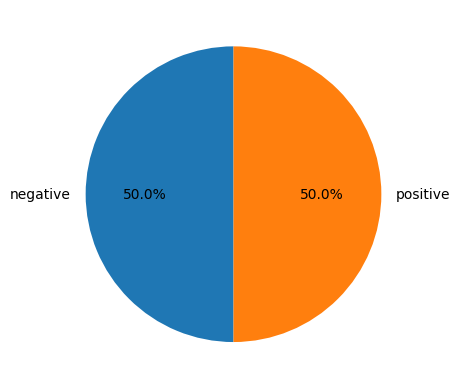

In [36]:
plt.pie(full_df['label'].value_counts(), labels=['negative', 'positive'], autopct='%1.1f%%', startangle=90)
plt.show()

In [39]:
full_df['Word_count'] = full_df['sentence'].apply(lambda x: len(x.split()))
full_df['Char_count'] = full_df['sentence'].apply(len)
full_df

,sentence,label,Word_count,Char_count
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0,59,227
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0,165,706
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0,95,440
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0,30,138
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0,91,429
...,...,...,...,...
49996,"Quán không_gian nhỏ nhưng khá lịch_sự , sạch_s...",1,68,334
49997,đi ăn lần 2 : ) ) ) lần này rút kinh_nghiệm ki...,1,93,379
49998,"Mình ăn 2 món , mà quên tên mất rồi , toàn từ ...",1,146,597
49999,Trong ảnh là\n • 1 phần mì udon xào\n • 1 phần...,1,57,237


In [40]:
full_df['Mean_word_length'] = full_df['Char_count'] / full_df['Word_count']
full_df

,sentence,label,Word_count,Char_count,Mean_word_length
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0,59,227,3.847458
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0,165,706,4.278788
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0,95,440,4.631579
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0,30,138,4.600000
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0,91,429,4.714286
...,...,...,...,...,...
49996,"Quán không_gian nhỏ nhưng khá lịch_sự , sạch_s...",1,68,334,4.911765
49997,đi ăn lần 2 : ) ) ) lần này rút kinh_nghiệm ki...,1,93,379,4.075269
49998,"Mình ăn 2 món , mà quên tên mất rồi , toàn từ ...",1,146,597,4.089041
49999,Trong ảnh là\n • 1 phần mì udon xào\n • 1 phần...,1,57,237,4.157895


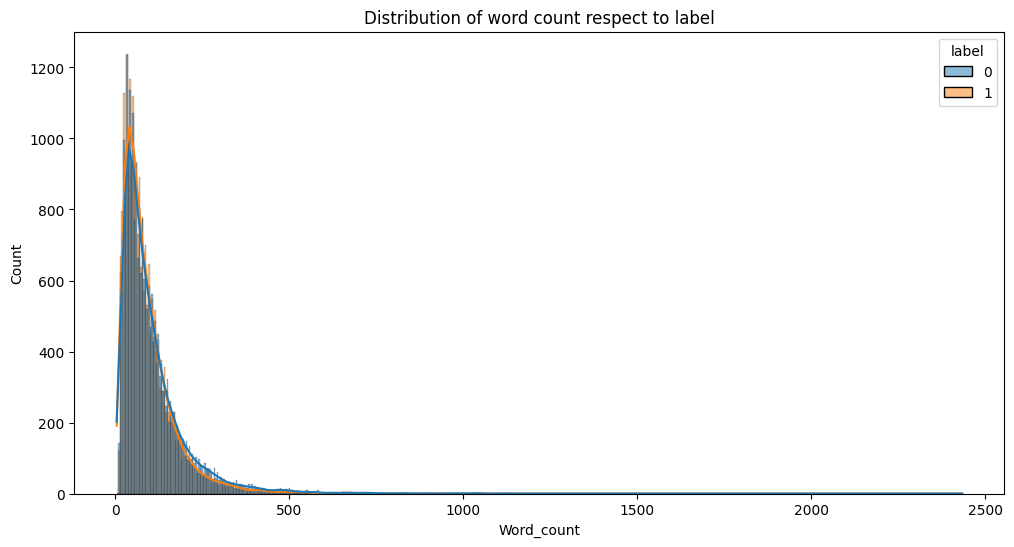

In [41]:
## Plot the distribution of word count respect to label 
plt.figure(figsize=(12, 6))
sns.histplot(data=full_df, x='Word_count', hue='label', kde=True)
plt.title('Distribution of word count respect to label')
plt.show()

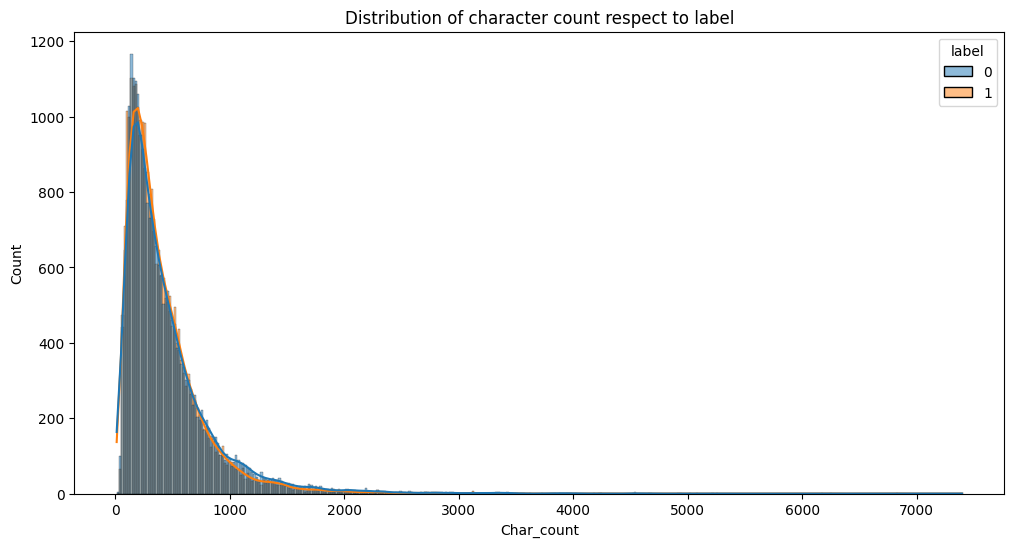

In [42]:
# Plot the distribution of character count respect to label
plt.figure(figsize=(12, 6))
sns.histplot(data=full_df, x='Char_count', hue='label', kde=True)
plt.title('Distribution of character count respect to label')
plt.show()

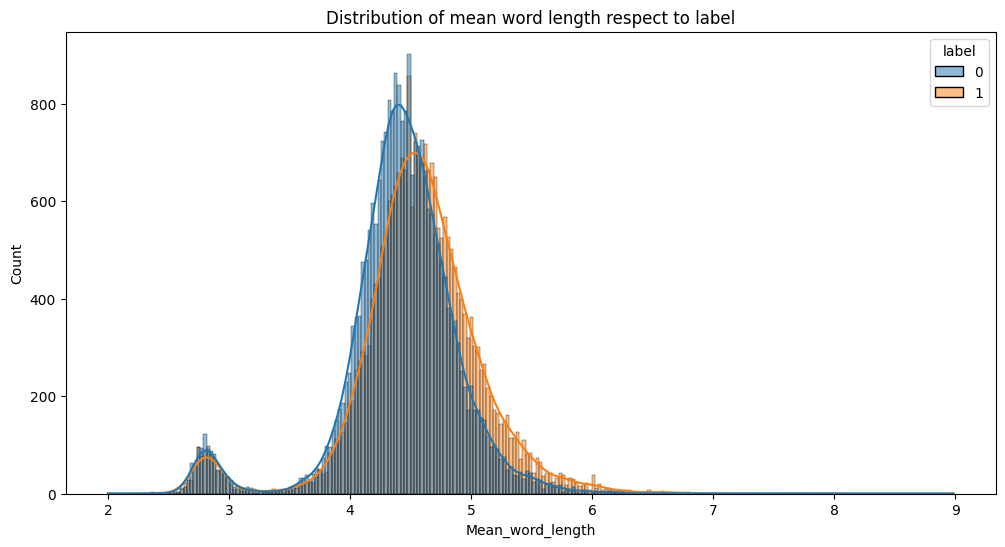

In [43]:
# Plot the mean word length respect to label
plt.figure(figsize=(12, 6))
sns.histplot(data=full_df, x='Mean_word_length', hue='label', kde=True)
plt.title('Distribution of mean word length respect to label')
plt.show()

# **Keep Vietnamese dataset**

In [51]:
full_df['language'] = full_df['sentence'].apply(detect)
languages = full_df['language'].nunique()

In [52]:
full_df['language']

0        vi
1        vi
2        vi
3        vi
4        vi
         ..
49996    vi
49997    vi
49998    vi
49999    vi
50000    vi
Name: language, Length: 50001, dtype: object

In [53]:
print(f'There are {languages} languages in the dataset')

There are 12 languages in the dataset


In [56]:
def identify_VN(df):
    identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
    not_vi = set()
    THRESHOLD = 0.9
    for idx, row in df.iterrows():
        lang, score = identifier.classify(row['sentence'])
        if lang != 'vi' or (lang == 'vi' and score < THRESHOLD):
            not_vi.add(idx)
    
    vi_df = df[~df.index.isin(not_vi)]
    not_vi_df = df[df.index.isin(not_vi)]
    return vi_df, not_vi_df

In [57]:
full_df.drop(columns=['language', 'Word_count', 'Char_count', 'Mean_word_length'], inplace=True)
full_df

,sentence,label
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,0
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\n Vuvuzela beer c...,0
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0
...,...,...
49996,"Quán không_gian nhỏ nhưng khá lịch_sự , sạch_s...",1
49997,đi ăn lần 2 : ) ) ) lần này rút kinh_nghiệm ki...,1
49998,"Mình ăn 2 món , mà quên tên mất rồi , toàn từ ...",1
49999,Trong ảnh là\n • 1 phần mì udon xào\n • 1 phần...,1


In [59]:
full_df, not_vi_df = identify_VN(full_df)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49579 entries, 0 to 50000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  49579 non-null  object
 1   label     49579 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [60]:
train_df, not_vi_train_df = identify_VN(train_df)
valid_df, not_vi_valid_df = identify_VN(valid_df)
test_df, not_vi_test_df = identify_VN(test_df)

# **Remove HTML tags, special character, emoji in text**

In [74]:
viet_luong_dict = {
    "ko": "không", "k": "không", "hok": "không", "hôg": "không", "hôk": "không",
    "j": "gì", "gìa": "gì", "zìa": "gì", "zì": "gì", "jì": "gì",
    "tl": "trả lời", "ntn": "như thế nào", "ntnao": "như thế nào", "tnào": "thế nào",
    "vkl": "rất", "vch": "vãi chưởng", "cx": "cũng", "kũg": "cũng", "cũg": "cũng",
    "z": "d", "thik": "thích", "thjk": "thích", "thíc": "thích", "thíck": "thích",
    "iu": "yêu", "ck": "chồng", "vk": "vợ", "mjk": "mình", "mih": "mình", "mìnk": "mình", "mjh": "mình",
    "bik": "biết", "pjt": "biết", "bít": "biết", "bik": "biết",
    "bn": "bạn", "pn": "bạn", "bbè": "bạn bè", "btrai": "bạn trai", "bgái": "bạn gái",
    "mng": "mọi người", "bme": "bố mẹ", "cta": "chúng ta", "ctrai": "con trai", "cgai": "con gái", "cgái": "con gái",
    "nhữg": "những", "svtn": "sinh viên tình nguyện", "qtam": "quan tâm", "qtâm": "quan tâm", "wtâm": "quan tâm",
    "thươg": "thương", "thgian": "thời gian", "thườg": "thường", "thíck": "thích",
    "chug": "chung", "chúg": "chúng", "trườg": "trường", "thoy": "thôi", "thuj": "thôi",
    "đki": "đăng ký", "đky": "đăng ký", "dky": "đăng ký", "atsm": "ảo tưởng sức mạnh",
    "ạk": "ạ", "cv": "công việc", "cviec": "công việc", "cviệc": "công việc",
    "cùg": "cùng", "keke": "ce ce", "ktra": "kiểm tra", "nek": "nè", "nèk": "nè",
    "nthe": "như thế", "nthê": "như thế", "nthế": "như thế", "nvay": "như vậy", "nvậy": "như vậy",
    "kái": "cái", "tìh": "tình", "phòg": "phòng", "phog": "phòng", "lòg": "lòng",
    "s2": "trái tim", "bt": "biết", "òy": "rồi", "zồi": "rồi", "zùi": "rồi", "rồii": "rồi",
    "dlgt": "đang làm gì thế", "nk4": "nha", "snvv": "sinh nhật vui vẻ", "hix": "hích", "hjx": "hích", "hixxx": "hích",
    "hjxhjx": "hích", "hihe": "hi he", "hìhì": "hì hì", "hêhê": "hê hê", "hiha": "hi ha",
    "xg": "xuống", "xuốg": "xuống", "xug": "xùng", "xih": "xinh", "ngía": "nghía",
    "ngke": "nghe", "ngag": "ngang", "ngốk": "ngốc", "ngđó": "người đó", "ngđo": "người đó", "ngkhác": "người khác",
    "ngyeu": "người yêu", "nyêu": "người yêu", "nyc": "người yêu cũ", "nàg": "nàng", "chàg": "chàng", "chăg": "chăng",
    "nkư": "như", "nhjeu": "nhiều", "nhiềuuu": "nhiều", "bnhiu": "bao nhiêu", "bnhiêu": "bao nhiêu",
    "kậu": "cậu", "kòn": "còn", "kủa": "của", "kảm": "cảm", "kqua": "kết quả", "ktra": "kiểm tra",
    "kb": "kết bạn", "lgi": "làm gì", "lzi": "làm gì", "lz": "làm gì", "lquen": "làm quen",
    "lạh": "lạnh", "lặg": "lặng", "lúk": "lúc", "ltinh": "linh tinh", "lquan": "liên quan",
    "llac": "liên lạc", "lzi": "làm gì", "làm": "làm",
    "đkiện": "điều kiện", "đki": "đăng ký", "đky": "đăng ký", "dky": "đăng ký",
}


def replace_teencode(text):
    words = text.split()
    return " ".join([viet_luong_dict[word] if word in viet_luong_dict else word for word in words])

def preprocess_text(text):
    text = text.lower()
    
    text = replace_teencode(text)
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r" ", text)
    
    html_pattern = re.compile(r'<.*?>')
    text = html_pattern.sub(r" ", text)
    
    text = emoji.demojize(text)
    
    text = " ".join(text.split())
    return text

In [75]:
train_df['sentence'] = train_df['sentence'].apply(preprocess_text)
valid_df['sentence'] = valid_df['sentence'].apply(preprocess_text)
test_df['sentence'] = test_df['sentence'].apply(preprocess_text)
full_df['sentence'] = full_df['sentence'].apply(preprocess_text)

In [76]:
print(len(train_df) + len(valid_df) + len(test_df))
full_df

49579


,sentence,label
0,mua có mỗi bingsu thập_cẩm 45k mà mình f đợi h...,0
1,thứ 6 nào ta cùng quẩy :bomb: :bomb: :bomb: vu...,0
2,"mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",0
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",0
4,"vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",0
...,...,...
49996,"quán không_gian nhỏ nhưng khá lịch_sự , sạch_s...",1
49997,đi ăn lần 2 : ) ) ) lần này rút kinh_nghiệm ki...,1
49998,"mình ăn 2 món , mà quên tên mất rồi , toàn từ ...",1
49999,trong ảnh là • 1 phần mì udon xào • 1 phần cuố...,1


# **Conver to csv**

In [82]:
path = r'./cleaned_data/'
train_df.to_csv(path + 'train.csv', index=False, encoding='utf-8')
valid_df.to_csv(path + 'valid.csv', index=False, encoding='utf-8')
test_df.to_csv(path + 'test.csv', index=False, encoding='utf-8')